In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [4]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [5]:
#Analysis on Given Dataset
#HOW many categories on output column deposit 
df["deposit"].unique()

array([1, 0], dtype=int64)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


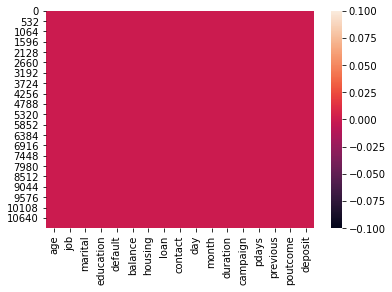

In [6]:
#Check null values
print(df.isnull().sum())
#visualise 
sns.heatmap(df.isnull())
plt.show()

In [7]:
#check datatype
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
deposit      int64
dtype: object

In [8]:
#Select input and output variable from dataset
X=df.drop("deposit",axis=1) #select all input features except deposit
#or X=df.iloc[:,:-1]
Y=df["deposit"] #select target means output variable or Y=df.iloc[:,-1]

In [9]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
#First apply scaling on input data before train the data
#Apply standard scaler for input data training and testing

from sklearn.preprocessing import StandardScaler
#Create a object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [11]:
#create a function
def create_model(model): 
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# use baseline model:logisticregression
# from sklearn.linear_model import LogisticRegression

In [14]:
# create object of logisticregression
# lr=LogisticRegression()

In [15]:
# call function
# lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1441  319]
 [ 359 1230]]


In [ ]:
# after using baseline model LogisticRegression we got recall(0)=0.82 and recall(1)=0.77 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# # create the object of decision DecisionTreeClassifier class
# dt=DecisionTreeClassifier(random_state=1)
# # call funciton
# dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1760
           1       0.78      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

[[1407  353]
 [ 372 1217]]


In [18]:
# # show the information gain of all input features
# IG=dt.feature_importances_
# print('information gain',IG)
# # feature_importances_ inbuilt method of DecisionTreeClassifier class

information gain [0.07713619 0.03421951 0.01696765 0.01435638 0.00045636 0.0844372
 0.04261978 0.00693398 0.06179287 0.07658144 0.09835692 0.35400803
 0.02231605 0.04785625 0.02585105 0.03611034]


In [19]:
# X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [20]:
# dict={'input':X.columns,'IG':IG}
# # convert into dataframe
# df1=pd.DataFrame(dict)
# df1.sort_values('IG',ascending=False)# descending order accordiing to IG

,input,IG
11,duration,0.354008
10,month,0.098357
5,balance,0.084437
0,age,0.077136
9,day,0.076581
8,contact,0.061793
13,pdays,0.047856
6,housing,0.042620
15,poutcome,0.036110
1,job,0.034220


In [21]:
# pruning technique to reduce (overcome) overfitting
# 1.max_depth (<=8)
# 2.min_sample_leaf(>=45 or more <=100)

In [22]:
#create object of decisiontrreclaassifier class and passing the parameter 
#max_depth
# dt1=DecisionTreeClassifier(random_state=1,max_depth=3)

In [23]:
# call function
# dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78      0.77      3349
weighted avg       0.78      0.77      0.77      3349

[[1212  548]
 [ 218 1371]]


In [24]:
# I=X.columns

In [25]:
# #create the tree 
# from sklearn import tree
# features=X.columns #input features
# fig=plt.figure(figsize=(20,20))
# _=tree.plot_tree(dt1,feature_names=features,filled=True)

In [26]:
# #2nd purning technique : min_samples_leaf
# #min_samples_leaf =45 or more means not less than=45
# ##create object of DecisionTreeClassifier class
# #leaf node means no child
# dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=55)

In [27]:
# call function
# dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.83      0.82      3349
weighted avg       0.83      0.82      0.82      3349

[[1414  346]
 [ 242 1347]]


In [29]:
# for i in range(45,101,5):
#   print(i)
#   # dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i) #by default gini
#   #call funciton
#   dt2=create_model(dt2)

In [31]:
# for i in range(45,101,5):
#   print(i)
#   # dt2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i,criterion='entropy')
#   #call funciton
#   dt2=create_model(dt2)                                                                                                       

45
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.83      0.82      3349
weighted avg       0.83      0.82      0.82      3349

[[1414  346]
 [ 242 1347]]
50
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.83      0.82      3349
weighted avg       0.83      0.82      0.82      3349

[[1414  346]
 [ 242 1347]]
55
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.83      0.82      3349
weighted av

In [ ]:
# after using  model DecisionTreeClassifier with gini we got recall(0)=0.80 and recall(1)=0.77
# after using pruning technique with max_depth recall(0)=0.69 and recall(1)=0.86 and with mean_samples_leaf recall(0)=0.80
# recall(1)=0.85

In [32]:
# use ensempling technique on banking dataset 
#random foresttree

In [33]:
# X.shape

(11162, 16)

In [34]:
# from sklearn.ensemble import RandomForestClassifier

In [35]:
# # create object of RandomForestClassifier
# for i in range(1,200):
#   rfc=RandomForestClassifier(n_estimators=i,max_features=10,random_state=1)
#   #by default gini
#   #call funciton
#   print('no of decision tree',i)
#   rfc=create_model(rfc)
# #here n_estimators means take how many no. of decisiontree 
# #max_features means take how many input

In [36]:
# #  create object of RandomForestClassifier
# for i in range(1,17):
#   rfc=RandomForestClassifier(n_estimators=15,max_features=i,random_state=1)
#   #by default gini
#   #call funciton
#   print('no of feature',i)
#   rfc=create_model(rfc)

In [37]:
rfc=RandomForestClassifier(n_estimators=15,max_features=5,random_state=1)
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1760
           1       0.81      0.88      0.84      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1429  331]
 [ 198 1391]]


In [ ]:
# after using  model RandomForestClassifier  we got recall(0)=0.81 and recall(1)=0.88

In [38]:
# Boosting

In [39]:
# from sklearn.ensemble import AdaBoostClassifier

In [40]:
# create object for AdaBoostClassifier class
# for i in range(1,17):
  # ada=AdaBoostClassifier(random_state=1,n_estimators=i)
  # print('no of features',i)
  # ada=create_model(ada) #call function

In [41]:
# ada=AdaBoostClassifier(random_state=1,n_estimators=3)
# ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1760
           1       0.72      0.80      0.76      1589

    accuracy                           0.76      3349
   macro avg       0.76      0.76      0.76      3349
weighted avg       0.76      0.76      0.76      3349

[[1262  498]
 [ 310 1279]]


In [42]:
# # show the information gain of all input features
# IG=ada.feature_importances_
# dict={'input':X.columns,'IG':IG}
# # convert into dataframe
# df1=pd.DataFrame(dict)
# df1.sort_values('IG',ascending=False)# descending order accordiing to IG

,input,IG
11,duration,0.666667
8,contact,0.333333
0,age,0.000000
1,job,0.000000
2,marital,0.000000
3,education,0.000000
4,default,0.000000
5,balance,0.000000
6,housing,0.000000
7,loan,0.000000


In [ ]:
# after using  model AdaboostClassifier with  we got recall(0)=0.72 and recall(1)=0.80

In [43]:
# call gradientboostingclassifier class from following package
# from sklearn.ensemble import GradientBoostingClassifier

In [44]:
# # create class of gradientboostingclassifier class
# for i in range(1,101):
#   gbc=GradientBoostingClassifier(random_state=1,n_estimators=i)
#   #call function
#   print('no of n_estimators',i)
#   gbc=create_model(gbc)
#   # n_estimator can be <=100
#   #algo. use decisiontreeclassifier

In [45]:
# gbc=GradientBoostingClassifier(random_state=1,n_estimators=51)
# gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349

[[1427  333]
 [ 246 1343]]


In [ ]:
# after using  model GradienBoosting  we got recall(0)=0.81 and recall(1)=0.85

In [46]:
# Extreme gradient boosting:XGB Boosting

In [47]:
# from xgboost import XGBClassifier

In [48]:
# # create object of class xgbclassifier
# for i in range(1,101):
#   xgc=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
#   #call function
#   print('no of estimators',i)
#   xgc=create_model(xgc)
#   #automatic overfitting:reg means regularizationi and alpha or lambda
#   #hyperparameter
#   #n_enstimators<=100

In [49]:
# xgc=XGBClassifier(n_estimators=2,random_state=1,reg_alpha=1)
# xgc=create_model(xgc)

In [50]:
# # linear kernel function
# # call class
# from sklearn.svm import LinearSVC
# # linearsvc means linear support vector classifier
# # create object
# svc=LinearSVC(random_state=1) #hard margin default

In [51]:
# svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1444  316]
 [ 364 1225]]


In [54]:
# # check whether model is overfit or not means add external error
# # during training time
# # create object
# svc1=LinearSVC(random_state=1,C=0.6) 
# # here c inbuiilt parameeter which pass the values =0.5(0.001to 1)
# # value of c<=1

In [55]:
# # call funcitoin
# svc=create_model(svc1)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.80      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349

[[1446  314]
 [ 364 1225]]


In [ ]:
# after using  model SupportVactorMachine  we got recall(0)=0.82 and recall(1)=0.77

## Conclusion

#### after using baseline model LogisticRegression we got recall(0)=0.82 and recall(1)=0.77 
#### after using  model DecisionTreeClassifier with gini we got recall(0)=0.80 and recall(1)=0.77
#### after using pruning technique with max_depth recall(0)=0.69 and recall(1)=0.86 and with mean_samples_leaf recall(0)=0.80
#### recall(1)=0.85
#### after using  model RandomForestClassifier  we got recall(0)=0.81 and recall(1)=0.88
#### after using  model AdaboostClassifier with  we got recall(0)=0.72 and recall(1)=0.80
#### after using  model GradienBoosting  we got recall(0)=0.81 and recall(1)=0.85
#### after using  model SupportVactorMachine  we got recall(0)=0.82 and recall(1)=0.77
#### above we can see best recall accuracy for this dataset is RandomForestClassifier ensemble technique which accuracy 
#### is 0.88 for 1..
#### so best model for this dataset is RandomForestClassifier ensemble technique with 0.88 accuracy